In [19]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import pandas as pd
import numpy as np
import IPython.display as ipd


In [20]:
# audio 1 
audio_1_path = "audio1.wav"
ipd.Audio(audio_1_path)

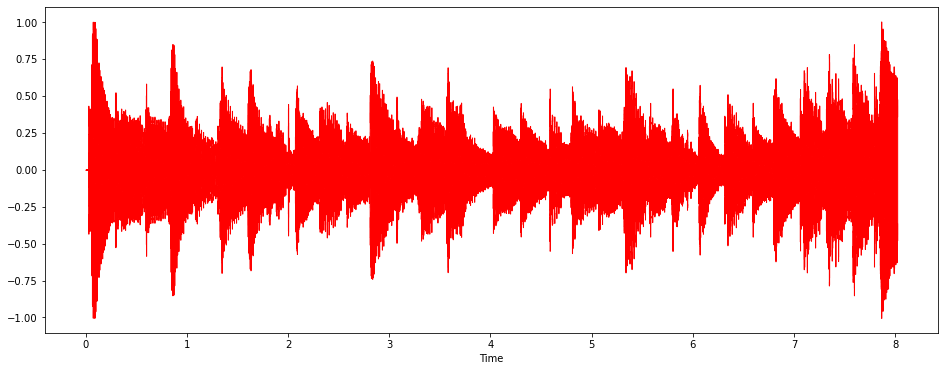

In [21]:
data, sample_rate = librosa.load(audio_1_path)
plt.figure(figsize=(16, 6))
librosa.display.waveshow(data, sr=sample_rate, color='red')

In [22]:
# recorded audio 
audio_record_path = "record.wav"
ipd.Audio(audio_record_path)

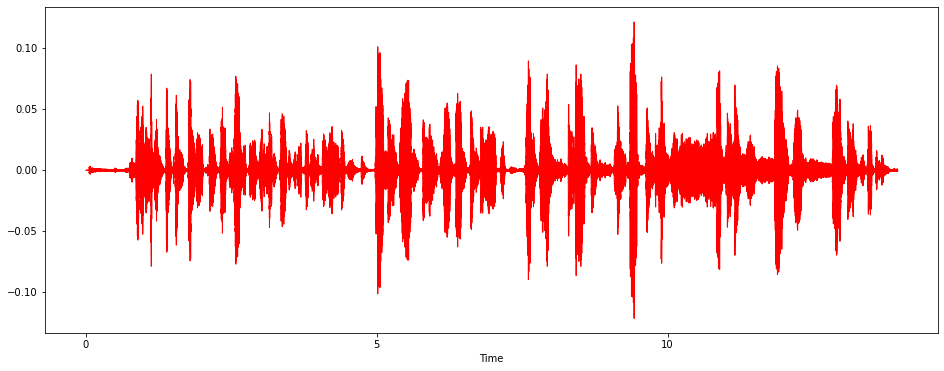

In [23]:
data, sample_rate = librosa.load(audio_record_path)
plt.figure(figsize=(16, 6))
librosa.display.waveshow(data, sr=sample_rate, color='red')

In [24]:
# mixing file 
from pydub import AudioSegment
sound1 = AudioSegment.from_file("audio1.wav")
sound2 = AudioSegment.from_file("record.wav")

combined = sound1.overlay(sound2)

combined.export("mixing_audio.wav", format='wav')

<_io.BufferedRandom name='mixing_audio.wav'>

In [25]:
# mixing audio
mixing_audio_path = "mixing_audio.wav"
ipd.Audio(mixing_audio_path)

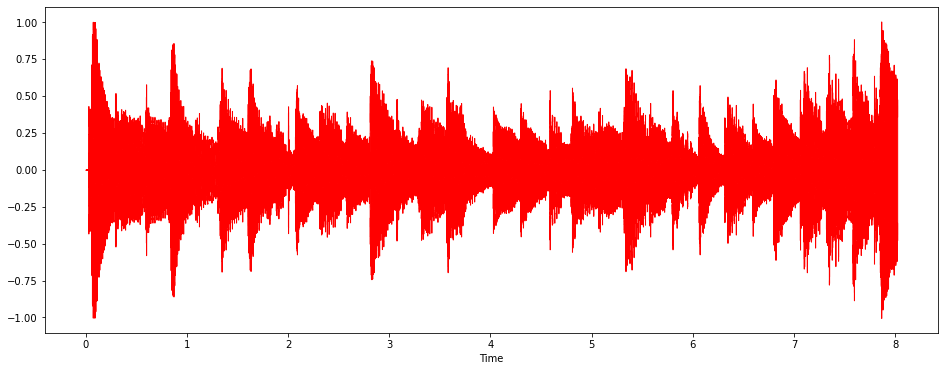

In [26]:
mixing_data, sample_rate = librosa.load(mixing_audio_path)
plt.figure(figsize=(16, 6))
librosa.display.waveshow(mixing_data, sr=sample_rate, color='red')

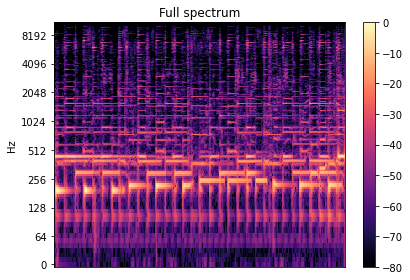

y(176841): [-6.8548152e-06 -1.7451715e-05 -4.0628620e-05 ... -4.2648782e-04
  1.5404117e-03 -1.9662937e-03]
sr: 22050
full(176640): [-0.00531837 -0.00624915 -0.00687387 ... -0.04967223 -0.03925059
 -0.0303106 ]


In [54]:
y, sr = librosa.load('mixing_audio.wav')

# idx = slice(*librosa.time_to_frames([30, 35], sr=sr))

S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,aggregate=np.median,metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))

S_filter = np.minimum(S_full, S_filter)

margin_i, margin_v = 2, 10
power = 2


# for foreground 
mask_v = librosa.util.softmask(S_full - S_filter,margin_v * S_filter,power=power)

# for background 
mask_i = librosa.util.softmask(S_filter, margin_i * (S_full - S_filter),power=power)

S_foreground = mask_v * S_full
S_background = mask_i * S_full


full = librosa.amplitude_to_db(S_full, ref=np.max)
librosa.display.specshow(full, y_axis='log', sr=sr)

plt.title('Full spectrum')
plt.colorbar()

# plt.title('Background')
# plt.colorbar()
 
# plt.title('Foreground')
# plt.colorbar()
 

plt.tight_layout()
plt.show()

import soundfile


print("y({}): {}".format(len(y),y))
print("sr: {}".format(sr))

full_audio = librosa.istft(S_full)
foreground_audio = librosa.istft(S_foreground)
print("full({}): {}".format(len(full_audio), full_audio))

soundfile.write('orig.WAV', y, sr) 
soundfile.write('full.WAV', full_audio, sr) 
soundfile.write('foreground.WAV', foreground_audio, sr) 

In [55]:

print("y({}): {}".format(len(y),y))
print("sr: {}".format(sr))

full_audio = librosa.istft(S_full)
background_audio = librosa.istft(S_background)
print("full({}): {}".format(len(full_audio), full_audio))

soundfile.write('background.WAV', background_audio, sr) 

y(176841): [-6.8548152e-06 -1.7451715e-05 -4.0628620e-05 ... -4.2648782e-04
  1.5404117e-03 -1.9662937e-03]
sr: 22050
full(176640): [-0.00531837 -0.00624915 -0.00687387 ... -0.04967223 -0.03925059
 -0.0303106 ]


In [56]:
foreground_audio_path = "foreground.wav"
ipd.Audio(foreground_audio_path)

In [57]:
origin_audio_path = "orig.wav"
ipd.Audio(origin_audio_path)

In [58]:
background_audio_path = "background.wav"
ipd.Audio(background_audio_path)

In [27]:
sample_rate

22050

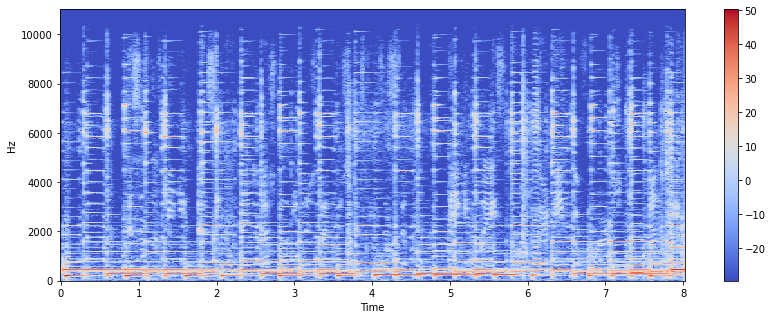

In [28]:
X = librosa.stft(mixing_data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

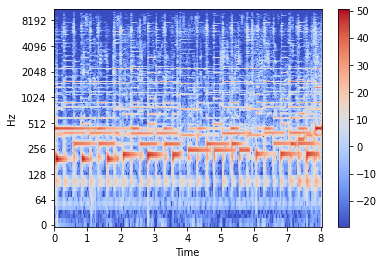

In [29]:
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar()

In [30]:
# background and foreground sound 



In [31]:
# import noisereduce as nr
# audio_data, sampling_rate = librosa.load(filepath)
# noisy_part = audio_data[8000:10000]
# reduced_noise = nr.reduce_noise(y=audio_data, y_noise=noisy_part, sr=sample_rate)
# # reduced_noise = nr.reduce_noise(audio_clip=audio_data, noise_clip=noisy_part, verbose=True)

C:\Users\H\AppData\Local\Temp\ipykernel_13776\2504059850.py:4: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('matplotlib inline')


Text(0, 0.5, 'Amplitude')

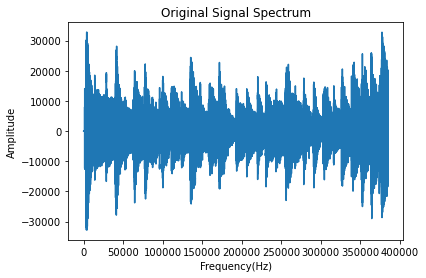

In [32]:
from scipy.io.wavfile import read  
from scipy.io.wavfile import write     
from scipy import signal  
get_ipython().magic('matplotlib inline')  

(Frequency, array) = read('mixing_audio.wav')  

len(array)  

plt.plot(array)   
plt.title('Original Signal Spectrum')  
plt.xlabel('Frequency(Hz)')  
plt.ylabel('Amplitude')  



In [33]:
# # plot -s 1000,600

# #  Read the audio signal with its sampling frequency in Hz
# [audio_signal,sampling_frequency] = audioread('mixing_audio.wav');

# #  Estimate the background signal, and the foreground signal
# background_signal = repet.original(audio_signal,sampling_frequency);
# foreground_signal = audio_signal-background_signal;

In [34]:
# FourierTransformation = sp.fft(array)  

# scale = sp.linspace(0, Frequency, len(array))  

# plt.stem(scale[0:5000], np.abs(FourierTransformation[0:5000]), 'r')    
# plt.title('Signal spectrum after FFT')  
# plt.xlabel('Frequency(Hz)')  
# plt.ylabel('Amplitude')  


# GuassianNoise = np.random.rand(len(FourierTransformation))  


# NewSound = GuassianNoise + array  

# write("New-Sound-Added-With-Guassian-Noise.wav", Frequency, NewSound)  

# b,a = signal.butter(5, 1000/(Frequency/2), btype='highpass')  

# filteredSignal = signal.lfilter(b,a,NewSound)  
# plt.plot(filteredSignal) # plotting the signal.  
# plt.title('Highpass Filter')  
# plt.xlabel('Frequency(Hz)')  
# plt.ylabel('Amplitude')  


# c,d = signal.butter(5, 380/(Frequency/2), btype='lowpass') # ButterWorth low-filter  
# newFilteredSignal = signal.lfilter(c,d,filteredSignal) # Applying the filter to the signal  
# plt.plot(newFilteredSignal) # plotting the signal.  
# plt.title('Lowpass Filter')  
# plt.xlabel('Frequency(Hz)')  
# plt.ylabel('Amplitude')  

# write("New-Filtered-Sound.wav", Frequency, newFilteredSignal)

In [35]:
# import time
# from datetime import timedelta as td


# def _stft(y, n_fft, hop_length, win_length):
#     return librosa.stft(y=y, n_fft=n_fft, hop_length=hop_length, win_length=win_length)


# def _istft(y, hop_length, win_length):
#     return librosa.istft(y, hop_length, win_length)


# def _amp_to_db(x):
#     return librosa.core.amplitude_to_db(x, ref=1.0, amin=1e-20, top_db=80.0)


# def _db_to_amp(x,):
#     return librosa.core.db_to_amplitude(x, ref=1.0)


# def plot_spectrogram(signal, title):
#     fig, ax = plt.subplots(figsize=(20, 4))
#     cax = ax.matshow(
#         signal,
#         origin="lower",
#         aspect="auto",
#         cmap=plt.cm.seismic,
#         vmin=-1 * np.max(np.abs(signal)),
#         vmax=np.max(np.abs(signal)),
#     )
#     fig.colorbar(cax)
#     ax.set_title(title)
#     plt.tight_layout()
#     plt.show()


# def plot_statistics_and_filter(
#     mean_freq_noise, std_freq_noise, noise_thresh, smoothing_filter
# ):
#     fig, ax = plt.subplots(ncols=2, figsize=(20, 4))
#     plt_mean, = ax[0].plot(mean_freq_noise, label="Mean power of noise")
#     plt_std, = ax[0].plot(std_freq_noise, label="Std. power of noise")
#     plt_std, = ax[0].plot(noise_thresh, label="Noise threshold (by frequency)")
#     ax[0].set_title("Threshold for mask")
#     ax[0].legend()
#     cax = ax[1].matshow(smoothing_filter, origin="lower")
#     fig.colorbar(cax)
#     ax[1].set_title("Filter for smoothing Mask")
#     plt.show()


# def removeNoise(
#     audio_clip,
#     noise_clip,
#     n_grad_freq=2,
#     n_grad_time=4,
#     n_fft=2048,
#     win_length=2048,
#     hop_length=512,
#     n_std_thresh=1.5,
#     prop_decrease=1.0,
#     verbose=False,
#     visual=False,
# ):
#     """Remove noise from audio based upon a clip containing only noise

#     Args:
#         audio_clip (array): The first parameter.
#         noise_clip (array): The second parameter.
#         n_grad_freq (int): how many frequency channels to smooth over with the mask.
#         n_grad_time (int): how many time channels to smooth over with the mask.
#         n_fft (int): number audio of frames between STFT columns.
#         win_length (int): Each frame of audio is windowed by `window()`. The window will be of length `win_length` and then padded with zeros to match `n_fft`..
#         hop_length (int):number audio of frames between STFT columns.
#         n_std_thresh (int): how many standard deviations louder than the mean dB of the noise (at each frequency level) to be considered signal
#         prop_decrease (float): To what extent should you decrease noise (1 = all, 0 = none)
#         visual (bool): Whether to plot the steps of the algorithm

#     Returns:
#         array: The recovered signal with noise subtracted

#     """
#     if verbose:
#         start = time.time()
#     # STFT over noise
#     noise_stft = _stft(noise_clip, n_fft, hop_length, win_length)
#     noise_stft_db = _amp_to_db(np.abs(noise_stft))  # convert to dB
#     # Calculate statistics over noise
#     mean_freq_noise = np.mean(noise_stft_db, axis=1)
#     std_freq_noise = np.std(noise_stft_db, axis=1)
#     noise_thresh = mean_freq_noise + std_freq_noise * n_std_thresh
#     if verbose:
#         print("STFT on noise:", td(seconds=time.time() - start))
#         start = time.time()
#     # STFT over signal
#     if verbose:
#         start = time.time()
#     sig_stft = _stft(audio_clip, n_fft, hop_length, win_length)
#     sig_stft_db = _amp_to_db(np.abs(sig_stft))
#     if verbose:
#         print("STFT on signal:", td(seconds=time.time() - start))
#         start = time.time()
#     # Calculate value to mask dB to
#     mask_gain_dB = np.min(_amp_to_db(np.abs(sig_stft)))
#     print(noise_thresh, mask_gain_dB)
#     # Create a smoothing filter for the mask in time and frequency
#     smoothing_filter = np.outer(
#         np.concatenate(
#             [
#                 np.linspace(0, 1, n_grad_freq + 1, endpoint=False),
#                 np.linspace(1, 0, n_grad_freq + 2),
#             ]
#         )[1:-1],
#         np.concatenate(
#             [
#                 np.linspace(0, 1, n_grad_time + 1, endpoint=False),
#                 np.linspace(1, 0, n_grad_time + 2),
#             ]
#         )[1:-1],
#     )
#     smoothing_filter = smoothing_filter / np.sum(smoothing_filter)
#     # calculate the threshold for each frequency/time bin
#     db_thresh = np.repeat(
#         np.reshape(noise_thresh, [1, len(mean_freq_noise)]),
#         np.shape(sig_stft_db)[1],
#         axis=0,
#     ).T
#     # mask if the signal is above the threshold
#     sig_mask = sig_stft_db < db_thresh
#     if verbose:
#         print("Masking:", td(seconds=time.time() - start))
#         start = time.time()
#     # convolve the mask with a smoothing filter
#     sig_mask = scipy.signal.fftconvolve(sig_mask, smoothing_filter, mode="same")
#     sig_mask = sig_mask * prop_decrease
#     if verbose:
#         print("Mask convolution:", td(seconds=time.time() - start))
#         start = time.time()
#     # mask the signal
#     sig_stft_db_masked = (
#         sig_stft_db * (1 - sig_mask)
#         + np.ones(np.shape(mask_gain_dB)) * mask_gain_dB * sig_mask
#     )  # mask real
#     sig_imag_masked = np.imag(sig_stft) * (1 - sig_mask)
#     sig_stft_amp = (_db_to_amp(sig_stft_db_masked) * np.sign(sig_stft)) + (
#         1j * sig_imag_masked
#     )
#     if verbose:
#         print("Mask application:", td(seconds=time.time() - start))
#         start = time.time()
#     # recover the signal
#     recovered_signal = _istft(sig_stft_amp, hop_length, win_length)
#     recovered_spec = _amp_to_db(
#         np.abs(_stft(recovered_signal, n_fft, hop_length, win_length))
#     )
#     if verbose:
#         print("Signal recovery:", td(seconds=time.time() - start))
#     if visual:
#         plot_spectrogram(noise_stft_db, title="Noise")
#     if visual:
#         plot_statistics_and_filter(
#             mean_freq_noise, std_freq_noise, noise_thresh, smoothing_filter
#         )
#     if visual:
#         plot_spectrogram(sig_stft_db, title="Signal")
#     if visual:
#         plot_spectrogram(sig_mask, title="Mask applied")
#     if visual:
#         plot_spectrogram(sig_stft_db_masked, title="Masked signal")
#     if visual:
#         plot_spectrogram(recovered_spec, title="Recovered spectrogram")
#     return recovered_signal

In [36]:
# ipd.Audio(data=data, rate=sample_rate)